# Project Check-In: Problem Statement & EDA

## Problem Statement
High-quality, labeled data is a critical component in the development of computer vision models. Collecting this data can be costly in terms of both time and money. Active learning is a method to address these costs by making annotation and training more efficient. In this project, I will implement uncertainty and diversity sampling on the CIFAR-10 dataset to demonstrate how active learning can reduce the amount of labeled data required to reach the target accuracy for a computer vision model.

**Dataset Info**
- [Source: The CIFAR-10 Datset](https://www.cs.toronto.edu/~kriz/cifar.html)
- Training data contains 50,000 images (10 categories, 5,000 images each)
- Testing data contains 10,000 images (10 categories, 1,000 images each)
- The CIFAR-10 dataset is a labeled subset of the [80 million tiny images dataset](http://groups.csail.mit.edu/vision/TinyImages/), which was withdrawin in 2020 due to concerns about derogitory categories and offensive images. To the best of my knowledge, the CIFAR-10 dataset is not affected by these issues. 
- Researchers using a CNN to categorize these images have previously obtained 82% accuracy without data augmentation and 89% accuracy with data augmentation.

## EDA

In [84]:
import pickle
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [137]:
# Load the training images
base_path = './data/train_images/'
for ix, fname in enumerate(os.listdir(base_path)):
    with open(base_path + fname, 'rb') as f:
        f_dict = pickle.load(f, encoding='bytes')
        f_labels = np.array(f_dict[b'labels'])
        f_data = f_dict[b'data'].reshape([10000, 3, 32, 32]).transpose([0, 2, 3, 1])
    labels = np.concatenate((labels, f_labels)) if ix else f_labels
    data = np.concatenate((data, f_data)) if ix else f_data

In [147]:
# Load the label mappings
with open('./data/batches.meta', 'rb') as f:
    f_dict = pickle.load(f)
label_map = dict(zip(range(10), f_dict['label_names']))

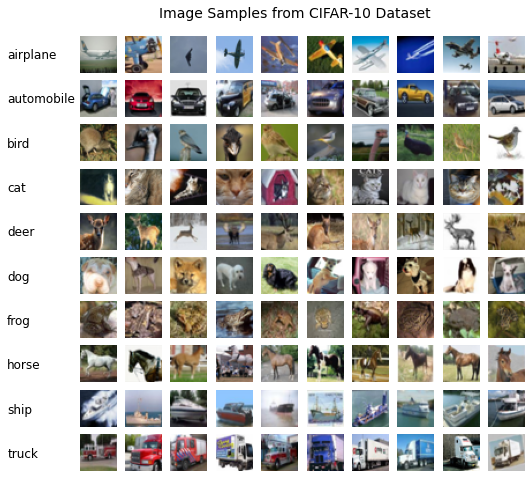

In [186]:
# Display some tiny images
# This is a replication of the chart at https://www.cs.toronto.edu/~kriz/cifar.html
fig, axs = plt.subplots(10, 10, figsize=(8, 8))
for key, label in label_map.items():
    image_sample = data[labels == key][np.random.randint(5000, size=10)]
    fig.text(0, 0.84 - key/13, label, fontsize=12)
    for ix, image in enumerate(image_sample):
        ax = axs[key, ix]
        ax.imshow(image)
        ax.set_axis_off()
fig.suptitle('Image Samples from CIFAR-10 Dataset',
    fontsize=14,
    y=0.93);

## Next Steps
- Create a CNN and develop a system to simulate active learning with uncertainty and diversity sampling.
- Develop a Flask app for annotation (probably won't get used, but will showcase some web development & UX skills). 
- Put together the dataviz and presentation.